In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from tqdm import tqdm
from copy import deepcopy

In [2]:
# 시작점, 끝점을 하나의 넘파이로 합쳐놓기(테스트를 위해 시작점 2를 삽입없이 합치는 기능도 넣음)
def start_end_marge (end_point, start_point_1, start_point_2 = False):
    n = 2
    SE = np.array([])
    SE = np.append(SE, end_point)
    SE = np.append(SE, start_point_1)
    if (start_point_2 != False):
        SE = np.append(SE, start_point_2)
        n = 3
    SE = np.reshape(SE, (n, 2))
        
    return SE, n

In [3]:
#input_spot = int(input('input_spot(int) : '))
#input_range = float(input('input_range(float) : '))
#input_eps = float(input('input_eps(float) : '))
#input_min = int(input('input_min(int) : '))
input_spot = 25
input_range = 20
input_eps = 0.45
input_min  = 2
min_range = 0
max_range = 100

start_point_1 = (max_range - min_range) * np.random.random_sample(2) + min_range
#start_point_1 = [0.0, 0.0]
start_point_2 = [0.0, 0.0]
end_point = (max_range - min_range) * np.random.random_sample(2) + min_range
#end_point = [100.0, 100.0]

SE, SE_n = start_end_marge(end_point, start_point_1)

# 랜덤 스팟 생성

In [4]:
def make_random_spot (input_spot, min_range, max_range, input_x, rseed=None):
    if(rseed != None):
        np.random.seed(rseed)
        
    var = ['X', 'Y']
    labels=['spot0']
    for i in range(0,input_spot-1):
        z = 'spot'+str(i+1)
        labels.append(z)
        
    # X를 사전에 만들어둔게 없으면 랜덤으로 만들어줌
    # 만들어둔게 있다면 X를 input_x에 입력받아서 데이터 프레임 만들 때 사용
    if len(input_x) == 0:
        X = (max_range - min_range) * np.random.random_sample([input_spot,2]) + min_range
    else:
        X = input_x
    df = pd.DataFrame(X, columns = var, index = labels)
    
    return labels, X, df

In [5]:
def x(input_spot):
    in_x = [[151, 30], [6, 77], [118, 145], [13, 134], [80, 41], [119, 67], [28, 0], [148, 200], [22, 68], [134, 119], [194, 27], [128, 39], [103, 21], [8, 30], [57, 173], [86, 89], [22, 76], [48, 191], [186, 1], [38, 185], [116, 182], [198, 136], [41, 106], [126, 109], [155, 70], [102, 114], [21, 165], [23, 44], [123, 49], [183, 100], [2, 165], [150, 80], [80, 68], [190, 178], [93, 200], [89, 22], [177, 129], [78, 153], [151, 72], [141, 192], [195, 87], [73, 156], [180, 90], [120, 129], [126, 66], [70, 31], [43, 179], [111, 124], [0, 110], [119, 50], [174, 133], [128, 85], [120, 137], [145, 165], [72, 183], [21, 188], [100, 42], [40, 183], [118, 27], [168, 50], [43, 130], [98, 160], [181, 83], [125, 131], [94, 99], [45, 120], [24, 3], [82, 165], [174, 93], [85, 28], [87, 122], [174, 159], [12, 18], [66, 192], [189, 26], [56, 12], [92, 104], [15, 48], [92, 22], [190, 111], [27, 166], [45, 56], [64, 12], [186, 88], [105, 46], [114, 86], [190, 107], [59, 150], [178, 89], [200, 58], [136, 69], [160, 140], [188, 137], [169, 31], [135, 78], [126, 64], [41, 113], [66, 146], [10, 117], [191, 185]]
    input_x = np.array(in_x)
    input_spot = len(input_x)
    return input_x, input_spot

In [6]:
X, in_spot = x(input_spot)

# 랜덤한 값을 받을거면 input_x 자리에 [] 입력하고 아니라면 X를 입력하면 됨 (seed == 111)
labels, X, df = make_random_spot(input_spot, min_range, max_range, [])

# 군집 + 덴드로그램 출력

In [7]:
def hierarchical_dendrogram(df, labels, input_spot=0, row_dist_print=False, a_print=False, dendrogram_print=False):
    
    distmatrix = pdist(df, metric = 'euclidean')
    row_dist = pd.DataFrame(squareform(distmatrix), columns = labels, index = labels)
    
    if(input_spot == 0):
        print('row_dist 반환')
        return row_dist
    
    row_clusters = linkage(distmatrix, method = 'complete')
    
    if(row_dist_print == True):
        print_col = row_dist.iloc[:5,:5]
        print(print_col)
        
    if(a_print == True):
        a=pd.DataFrame(row_clusters,
            columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
            index = ['클러스터 %d' %(i+input_spot) for i in range(row_clusters.shape[0])])
        print(a[:5])
        
    if(dendrogram_print == True):
        plt.figure(figsize=(25,5))
        plt.subplot(121)
        plt.title('dendrogram')
        row_dendr = dendrogram(row_clusters, labels = labels)
        plt.tight_layout()
        plt.ylabel('euclide')
    
    return row_clusters

In [8]:
row_clusters = hierarchical_dendrogram(df, labels, input_spot)

# 군집별 넘버링 함수 + 출력

In [9]:
def cluster_numbering(row_clusters, input_range):
    # 넘버링에 필요한 재귀함수
    def found_num(Num, count, h):
        # ↓이미 넘버링 끝났는지 확인(끝났으면 0이므로 탈출, 아니면 지금 넘버링 시작이니 0으로 지정)
        if(iHave[Num][3]==0):
            return -1
        else:
            iHave[Num][3] = 0
            
        # 왼쪽 자식 확인
        if(iHave[Num][0] < h):
            cluster_done[int(iHave[Num][0])] = count
        else: #재귀
            left = int(iHave[Num][0]) - h
            found_num(left,count,h)
            
        # 오른쪽 자식 확인
        if(iHave[Num][1] < h):
            cluster_done[int(iHave[Num][1])] = count
        else: #재귀
            right = int(iHave[Num][1]) - h
            found_num(right,count,h)
        return
    
    rc_len = len(row_clusters)
    for i in range(0, rc_len):
        if(row_clusters[i][2] > float(input_range)):
            iHave = row_clusters[:i,:]
            num = i - 1 #몇 번의 합치기가 되었는지 저장
            break
            
    # 빈 리스트를 군집 개수 만큼 생성
    h = rc_len + 1
    cluster_done = [-1 for _ in range(h)]
    
    
    # 재귀 함수 호출
    count = 1
    for i in range(num, -1, -1):
        cycle = found_num(i, count, h)
        if (cycle != -1):
            count += 1
    
    return cluster_done

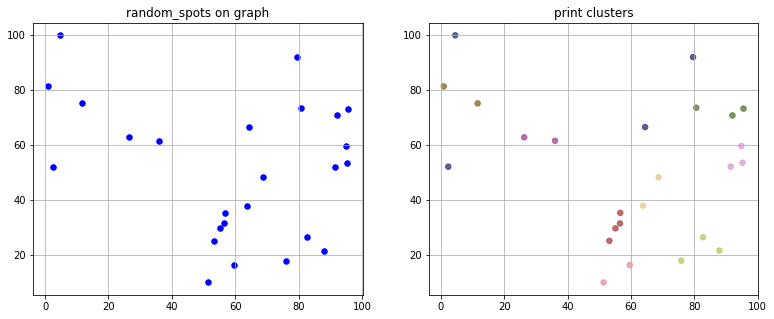

In [10]:
cluster_done = cluster_numbering(row_clusters.copy(), input_range)

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.title('random_spots on graph')
plt.scatter(X[:,0], X[:,1], c = 'blue', marker = 'o', s = 30)
plt.grid(True)

#점에 번호 붙여주는 기능↓ 나중에 주석 제거해서 사용가능
"""for i in range(0,input_spot):
    str_val = "(%.1f,%.1f)-%s"%(X[i,0], X[i,1], labels[i])
    plt.text(X[i,0]+0.5, X[i,1], str_val, fontsize=9, color='black',
             horizontalalignment = 'left', verticalalignment = 'center')"""

"""for i in range(0,input_spot):
    if(i == 0):
        str_val = "%s"%(labels[i])
    else:
        str_val = "0"
    plt.text(X[i,0]+0.5, X[i,1], str_val, fontsize=9, color='black',
             horizontalalignment = 'left', verticalalignment = 'top')"""

plt.subplot(122)
plt.title('print clusters')
plt.scatter(X[:,0], X[:,1], c=cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.8)
plt.grid(True)

plt.show()

# 군집별 중앙 값 검색(함수, 정렬, 중심찾기)

In [11]:
def quick_sort(centroid_X):
    def sort(low, high):
        if high <= low:
            return
        
        mid = partition(low, high)
        sort(low, mid - 1)
        sort(mid, high)
    
    def partition(low, high):
        pivot = centroid_X[(low + high) // 2][2]
        while low <= high:
            while centroid_X[low][2] < pivot:
                #print(centroid_X[low][2], low, pivot)
                low += 1
            while centroid_X[high][2] > pivot:
                high -= 1
            if low <= high:
                centroid_X[low][2], centroid_X[high][2] = centroid_X[high][2].copy(), centroid_X[low][2].copy()
                centroid_X[low][1], centroid_X[high][1] = centroid_X[high][1].copy(), centroid_X[low][1].copy()
                centroid_X[low][0], centroid_X[high][0] = centroid_X[high][0].copy(), centroid_X[low][0].copy()
                low, high = low + 1, high - 1
        return low
    
    return sort(0, len(centroid_X) - 1)

def marge_n_sort (input_spot, X, cluster_done):
    # 중앙 좌표 저장을 위한 numpy배열 생성(-1.0으로 모두 채움)
    centroid_X = np.full((input_spot, 3), -1.0)
    
    #스팟 좌표+소속 군집 번호
    for i in range(input_spot):
        centroid_X[i][0] = X[i][0]
        centroid_X[i][1] = X[i][1]
        centroid_X[i][2] = cluster_done[i]
    
    non_sort_centroid = centroid_X.copy()
    quick_sort(centroid_X)
    
    #노이즈 좌표 + 노이즈 번호(노이즈는 모두 -1)
    """for i in range(drop_len):
        non_sort_centroid = np.append(non_sort_centroid, (drop_list[i][0],drop_list[i][1],-1.0))
        centroid_X = np.append(centroid_X, (drop_list[i][0],drop_list[i][1],-1.0))"""
    
    non_sort_centroid = np.reshape(non_sort_centroid, (input_spot,3))
    centroid_X = np.reshape(centroid_X, (input_spot,3))
    
    return centroid_X, non_sort_centroid

In [12]:
def make_centroid(centroid_X):
    # 중심 좌표 계산
    count = 1
    sumx = sumy = 0.0
    centroid = np.array([])
    shape = 0
    
    for i in range(len(centroid_X)):
        if(centroid_X[i][2] == -1):
            continue
        
        sumx += centroid_X[i][0]
        sumy += centroid_X[i][1]
        count += 1
        if (i == len(centroid_X)-1) or (centroid_X[i][2] != centroid_X[i+1][2]):
            centroid = np.append(centroid, [sumx / float(count-1),sumy / float(count-1)])
            count = 1
            sumx = sumy = 0
            shape = int(centroid_X[i][2])
    
    centroid = np.reshape(centroid, (shape,2))
    
    return centroid

In [13]:
centroid_X, non_sort_centroid = marge_n_sort (input_spot, X, cluster_done)
centroid = make_centroid(centroid_X)
#print(len(centroid))
#print(centroid_X)

#  계층 군집되지 못한 노드들을 분리

In [14]:
def make_drop(new_X, new_cluster_done):
    drop_list = np.array([])
    drop_len = 0
    
    J = len(new_cluster_done)-1
    i = 0
    
    while True:
        if i >= J:
            break
        if new_cluster_done[i] == -1:
            del new_cluster_done[i]
            drop_list = np.append(drop_list, new_X[i])
            new_X = np.delete(new_X, i, axis = 0)
            drop_len += 1
            i -= 1
            J -= 1
        i += 1
    drop_list = drop_list.reshape(drop_len, 2)
    
    return new_X, drop_list, drop_len, new_cluster_done

In [15]:
new_X, drop_list, drop_len, new_cluster_done = make_drop(X.copy(), deepcopy(cluster_done))

# 최종 출력

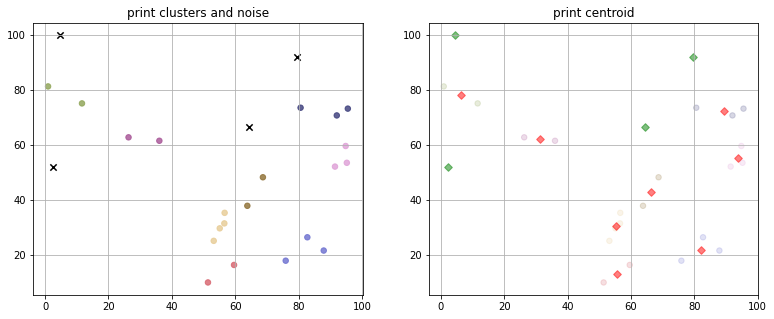

In [16]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.title('print clusters and noise')

plt.scatter(new_X[:,0], new_X[:,1], c=new_cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.8)
plt.scatter(drop_list[:, 0], drop_list[:, 1], marker = 'x', s=40, color = 'black')
plt.grid(True)


plt.subplot(122)
plt.title('print centroid')

plt.scatter(new_X[:,0], new_X[:,1], c=new_cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.2)
plt.scatter(drop_list[:, 0], drop_list[:, 1], marker = 'D', s=30, color = 'green', alpha = 0.5)
plt.scatter(centroid[:,0], centroid[:,1], marker = 'D', s=30, color = 'red', alpha = 0.5)
plt.grid(True)


plt.show()

# cenoise (군집 중심 + 노이즈만 합친 넘파이)
그리고 시작점, 끝점도 합쳐줌

In [17]:
cenoise = np.append(drop_list, centroid)
cenoise = np.reshape(cenoise, (drop_len+len(centroid),2))

"""plt.figure(figsize=(6,5))
for i in range(len(cenoise)):
    str_val = "%s"%str(i)
    plt.text(cenoise[i,0]+2, cenoise[i,1], str_val, fontsize=9, color='black',
             horizontalalignment = 'left', verticalalignment = 'center')

plt.title('print cenoise')
plt.scatter(cenoise[:, 0], cenoise[:, 1], marker = 'D', s=30, color = 'red')
plt.grid(True)
plt.show()"""

# cenoise에 시작점, 끝점 합침
cenoise = np.append(cenoise, SE)
cenoise = np.reshape(cenoise, (drop_len+len(centroid)+SE_n,2))

# coordinate_1 (각 스팟의 이동해야할 위치 배열 저장)

In [18]:
coordinate_1 = np.array([])
for i in range(len(non_sort_centroid)):
    n = int(non_sort_centroid[i][2])
    if(n != -1):
        coordinate_1 = np.append(coordinate_1, centroid[n-1].copy())
    else:
        coordinate_1 = np.append(coordinate_1, non_sort_centroid[i][:2].copy())

coordinate_1 = np.reshape(coordinate_1, (input_spot,2))
#X -> cluster_done -> centroid -> coordinate_1